# HW3 - Kernel methods and decision trees

## Task 1: Linear and polynomial kernels in SVM (2 points)

The goal of this task is to understand better how the choice of kernel and parameter values affect the performance of SVM. You are given a two-dimensional dataset with binary label and two features: $x_1$ and $x_2$. Your class labels are generated from the features using the XOR function, such that the class is positive when either $x_1 > 0$ or $x_2 > 0$ but not both. The following code creates this dataset and plots it.

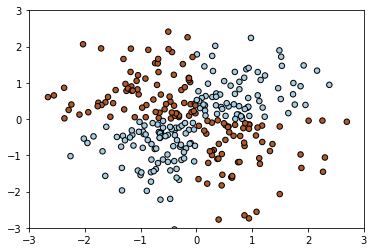

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0)

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

- **(a)** Let's first learn SVM with the linear kernel.

**<font color='purple'>(a) Please fill in the 2 gaps in the code.</font>**

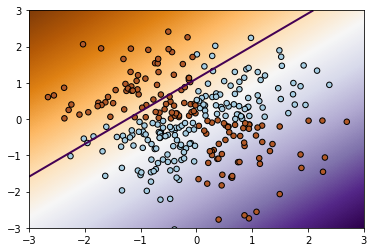

In [2]:
from sklearn import svm

# fit the model here:
svm_model = svm.SVC(kernel = "linear")
svm_model.fit(train_X, train_Y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    # plots the decision function for each datapoint on the grid
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-3, 3, -3, 3])
    
plot_svm(svm_model, train_X, train_Y)

- **(b)** Can SVM with linear kernel separate these data? 

**<font color='purple'>Answer to (b):</font>** No it cannot.


- **(c)** Now learn the SVM model with the polynomial kernel of degree 2 and degree 3. Which of them is able to learn the XOR function (not perfectly but reasonably well)?

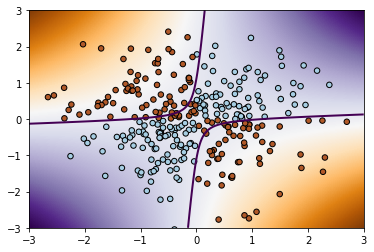

In [3]:
# fit the model here:
svm_model = svm.SVC(kernel = "poly", degree = 2)
svm_model.fit(train_X, train_Y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

plot_svm(svm_model, train_X, train_Y)

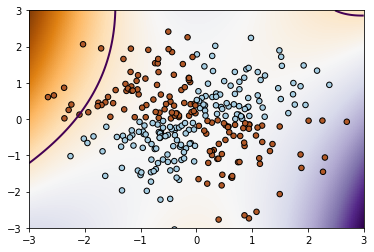

In [4]:
# fit the model here:
svm_model = svm.SVC(kernel = "poly", degree = 3)
svm_model.fit(train_X, train_Y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

plot_svm(svm_model, train_X, train_Y)

**<font color='purple'>Answer to (c):</font>** We can see that with a degree of 2 the model trains reasonably well.


- **(d)** Let us try to understand the reason why one degree worked well and the other not. Which of the following features is the most useful in discriminating the two classes: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1^3$, $x_2^3$, $x_1 x_2$, $x_1^2 x_2$, $x_2^2 x_1$? (Hint: If you cannot guess the right answer then you could visualize these as a surface, example code for $x_2^2 x_1$ is shown below where lighter colour is a hill and darker is valley)

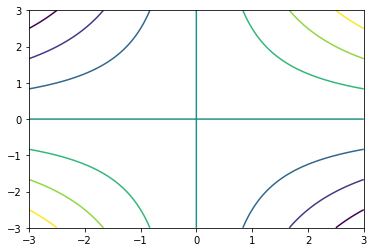

In [5]:
plt.contour(xx, yy, yy*xx)
plt.show()

**<font color='purple'>Answer to (d):</font>** Most useful should be $x_1x_2$, because it is how the XOR logic gate works as well.


- **(e)** Expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2$ (open the brackets) where $\mathbf{x}=(x_1,x_2)$ and $\mathbf{z}=(z_1,z_2)$. **<font color='purple'>For this please modify the following code for your purpose:</font>** Hint: we did this in the practice session, but you can follow a similar example at page 41 of Lecture 06.

In [6]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

x1,x2,z1,z2=sp.symbols('x_1 x_2 z_1 z_2')
sp.expand((x1*z1+x2*z2)**2)

  2   2                     2   2
x₁ ⋅z₁  + 2⋅x₁⋅x₂⋅z₁⋅z₂ + x₂ ⋅z₂ 

- **(f)** Please now list all features that are included in the constructed feature space $\phi(\mathbf{x})$ corresponding to the kernel $\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}\cdot\mathbf{z})^2$. Hint: You can read this out from your answer to **(e)** because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

**<font color='purple'>Answer to (f):</font>**
$\phi(x)=(x_1^2,\sqrt2x_1x_2,x_2^2)$

- **(g)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(f)**? Does this explain why polynomial kernel with degree 2 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (g):</font>** Yes, multiplied by $\sqrt2$. Yes, it does.


- **(h)** Please now expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$ similarly to subtask **(e)** and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel, as in subtask **(f)**. 

In [7]:
x1,x2,z1,z2=sp.symbols('x_1 x_2 z_1 z_2')
sp.expand((x1*z1+x2*z2)**3)

  3   3       2      2             2      2     3   3
x₁ ⋅z₁  + 3⋅x₁ ⋅x₂⋅z₁ ⋅z₂ + 3⋅x₁⋅x₂ ⋅z₁⋅z₂  + x₂ ⋅z₂ 

**<font color='purple'>Answer to (h):</font>**
$\phi(x)=(x_1^3,\sqrt3x_1^2x_2,\sqrt3x_1x_2^2,x_2^3)$

- **(i)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(h)**? Does this explain why polynomial kernel with degree 3 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (i):</font>** No it is not. This would explain very well why this kernel did not perform very well.


- **(j)** The polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this r is 0. Take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. Is the necessary feature present now?

In [8]:
x1,x2,z1,z2=sp.symbols('x_1 x_2 z_1 z_2')
sp.expand((x1*z1+x2*z2 + 1)**3)

  3   3       2      2          2   2          2      2                       
x₁ ⋅z₁  + 3⋅x₁ ⋅x₂⋅z₁ ⋅z₂ + 3⋅x₁ ⋅z₁  + 3⋅x₁⋅x₂ ⋅z₁⋅z₂  + 6⋅x₁⋅x₂⋅z₁⋅z₂ + 3⋅x₁

        3   3       2   2              
⋅z₁ + x₂ ⋅z₂  + 3⋅x₂ ⋅z₂  + 3⋅x₂⋅z₂ + 1

**<font color='purple'>Answer to (j):</font>** Yes, now it is present, multiplied by $\sqrt6$.


- **(k)** The value $r$ is represented by parameter 'coef0' in the SVC function. Change it to 1 and see if you can now learn XOR with polynomial kernel of degree 3. Report the resulting plot.

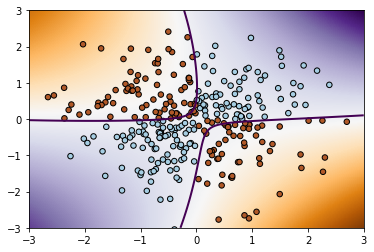

In [9]:
# fit the model here:
svm_model = svm.SVC(kernel = "poly", degree = 3, coef0 = 1)
svm_model.fit(train_X, train_Y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

plot_svm(svm_model, train_X, train_Y)

**<font color='purple'>Answer to (k):</font>** Yes, now the model fits quite well.


## Task 2: Gaussian kernel in SVM (1 point)

- **(a)** Make __6__ plots and show how RBF kernel works with different C values: 0.1, 0.5, 1, 2, 10, 100. What do you observe? What does parameter C do? 

    - Hint 1: Remember the soft-margin SVM formula and check out what the C parameter stood for. 
    - Hint 2: Use `plt.subplots(2, 3, figsize=...)` to arrange them nicely and `plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])` to plot to the subplot in row i and column j. 
    - Hint 3: Make sure you run `plt.show()` after the plotting.

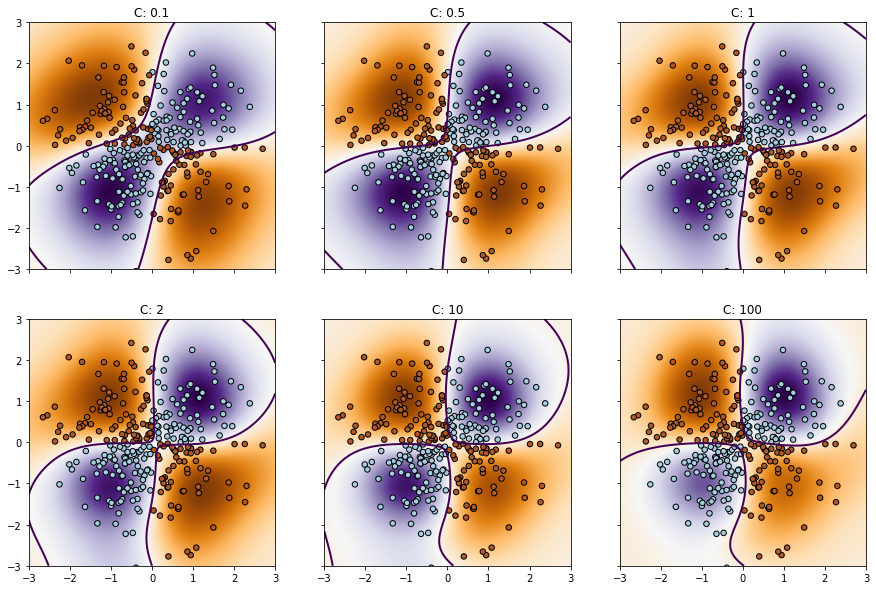

In [10]:
# fit the model here:
values = [0.1, 0.5, 1, 2, 10, 100]

fig, ax = plt.subplots(2,3, figsize=[15,10], sharex=True, sharey=True)
for i in range(6):
    svm_model = svm.SVC(values[i])
    svm_model.fit(train_X, train_Y)

    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))

    plot_svm(svm_model, train_X, train_Y, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title("C: " + str(values[i]))
plt.show()

**<font color='purple'>Answer to (a):</font>** C is the penalty parameter for errors. This means that if we have data that is misclassified, then with higher C values it gets punished more. We can see that from the plots as well, with higher C values the data becomes more seperated. Conversely with lower values we get more misclassified instances.


- **(b)** Now change the gamma parameter: 0.01, 0.5, 1, 2, 10, 100 and do the same as in the subtask **(a)**. What does the gamma parameter do? (Hint: check out the Gaussian kernel formula and rememeber that $\gamma = \frac{1}{2\sigma}$).

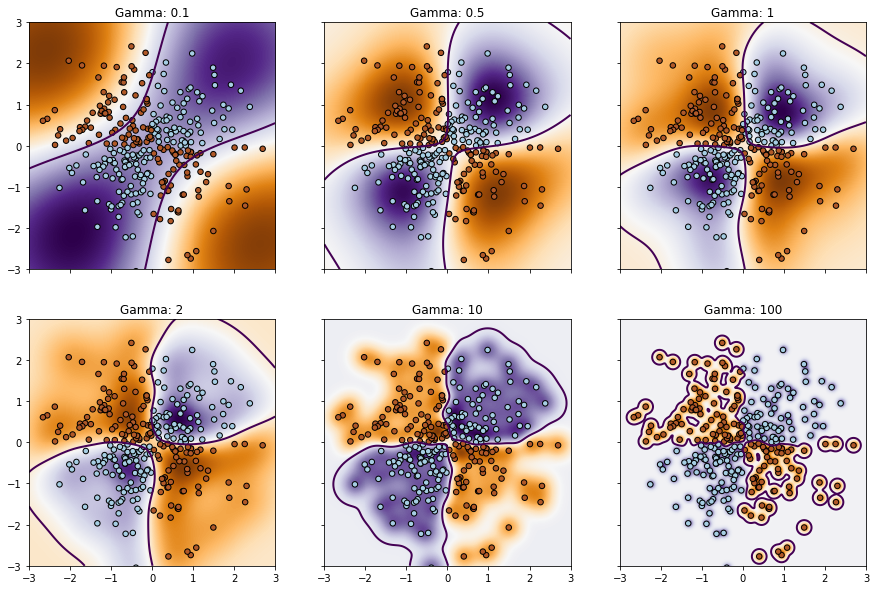

In [11]:
# fit the model here:
values = [0.1, 0.5, 1, 2, 10, 100]

fig, ax = plt.subplots(2,3, figsize=[15,10], sharex=True, sharey=True)
for i in range(6):
    svm_model = svm.SVC(gamma = values[i])
    svm_model.fit(train_X, train_Y)

    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))

    plot_svm(svm_model, train_X, train_Y, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title("Gamma: " + str(values[i]))
plt.show()

**<font color='purple'>Answer to (b):</font>** Gamma determines how much influence each point has. As we can see with low gamma values we have the whole plot classified, but with higher gamma values only smaller areas around each point get classified. With a low gamma value two points are more likely to get classified together even if they are very far away. So higher gamma values punish the distance between points.


## Task 3: Decision tree learning (3 points)

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset 'adult.data.csv' originating from https://archive.ics.uci.edu/ml/datasets/adult . This data file has been packaged together with the homework. The following code loads the dataset and prepares it for the task.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing

np.random.seed(0)
data = pd.read_csv("adult.data.csv", dtype="category", header = None, index_col = None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1", "education", "marital_status",
               "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
               "hours_per_week", "country", "income"]
data.dropna(inplace = True)
data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()
data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss",
          "country"], axis = 1, inplace = True)
a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [13]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,White,Male,45,>50K
8,31,Private,14,Never-married,Prof-specialty,White,Female,50,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,White,Male,40,>50K
10,37,Private,10,Married-civ-spouse,Exec-managerial,Black,Male,80,>50K
11,30,State-gov,13,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Male,40,>50K


The decision tree implementation in sklearn requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable.

In [14]:
data = pd.get_dummies(data, columns = ["workclass", "marital_status", "occupation", "race", "sex"])
data.head()

,age,education,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
7,52,9,45,>50K,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
8,31,14,50,>50K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
9,42,13,40,>50K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
10,37,10,80,>50K,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
11,30,13,40,>50K,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


We will consider the binary classification task of predicting income:

In [15]:
data.income.value_counts()

<=50K    7508
>50K     7508
Name: income, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"], test_size = 0.5, random_state = 0)

- **(a)** First build a decision tree of maximum depth 2, calculate train and test accuracies.

In [17]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)
tr_score = accuracy_score(y_train, dt.predict(X_train))
te_score = accuracy_score(y_test, dt.predict(X_test))

print("Training dataset accuracy is: " + str(tr_score))
print("Test dataset accuracy is: " + str(te_score))

Training dataset accuracy is: 0.7559936068193926
Test dataset accuracy is: 0.7566595631326585


**<font color='purple'>Answer to (a):</font>**  
The training dataset accuracy is $\sim0.756$  
The test dataset accuracy is $\sim0.757$


- **(b)** Plot the tree using the following code. Interpret the tree by verbally explaining what decisions it makes on different feature values.

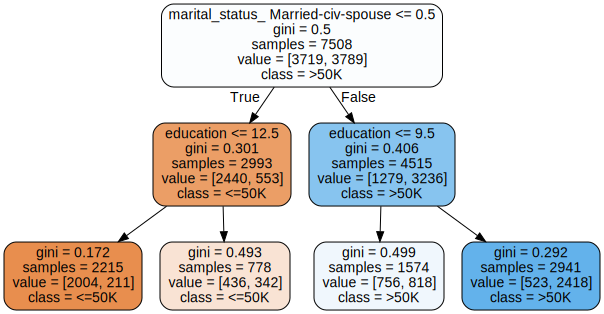

In [20]:
import graphviz
# here we assume that you have earlier defined a model 'dt = DecisionTreeClassifier(...)' and fitted it on training data
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X_train.columns,  
                                class_names=["<=50K", ">50K"],  
                                filled=True, rounded=True, 
                                special_characters=False) 
graph = graphviz.Source(dot_data)
graph

**<font color='purple'>Answer to (b):</font>** We can see that in the root node it classifies by probability. Since there are more "$>50k$" classes, it predicts always that. It is then split according to marital status, more specifically if the marital status is "Married-civ-spouse". Then we split both of the resulting nodes by education, with different splits on both of the nodes. Then we have a finished tree.


**(c)** Explain how decision tree deals with:

1. binary features
2. categorical features
3. continuous features

by describing what all possible splits are that the learning algorithm considers in case of these three types.

**<font color='purple'>Answer to (c):</font>**  
1. binary features - Splits the node into two parts, TRUE/FALSE nodes.
2. categorical features - Splits the node into n parts, where n is the number of unique values in the category. So each feature value gets its own node.
3. continuous features - Splits the node into two parts, usually finds a leverage point in the known values where the gain is the biggest. In the previous example we can see that education is the continous featuer and the leverage point is $12.5$


- **(d)** Next, build a tree with the default parameters and calculate the train and test accuracy. Is the model good? Why/why not? Explain what are the default parameters used in sklearn for decision tree and how they influence this kind of result?

In [38]:
det = DecisionTreeClassifier().fit(X_train, y_train)
tr_score = accuracy_score(y_train, det.predict(X_train))
te_score = accuracy_score(y_test, det.predict(X_test))

print("Training dataset accuracy is: " + str(tr_score))
print("Test dataset accuracy is: " + str(te_score))

Training dataset accuracy is: 0.9790889717634523
Test dataset accuracy is: 0.7334842834310069


**<font color='purple'>Answer to (d):</font>** It is almost as good as the previous model, the accuracy is a bit lower. This model is not good, since the default parameters usually overfit the model. Probably the $4$ most important parameters are the criterion, splitter, max_depth and min_samples_split. The criterion usually does not matter, since gini and entropy are quite similar. The splitter parameter starts to change things. If we choose the best split randomly, we can usually rely on the model not to overfit, but we cannot be sure it is the best model. By default it is set to best split. Then we have probably the most influential parameter, max_depth. If the tree depth is too high, then we have a higher chance of the model overfitting. Usually setting this manually guarantees a better fit for the model. We also have min_samples_split, which determines when the model stops splitting nodes. The default value is $2$, which is an arbitrary value for datasets with higher dimensions and might end in overfitting again.


- **(e)** Modify the learning algorithm to get rid of the problem you had in the previous step. Try to change at least 3 parameters (first one at a time, then all together, try different combinations). Report the three parameters you experimented with and explain how they can be used to improve the tree (what do they do?). Which values did you try and what gave the best results? Build the final tree (don't show the experimenting code) and report train and test accuracies. You should achieve test accuracy > 79% without too much overfitting (meaning that training accuracy should be quite similar).

In [81]:
detm = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 8, min_samples_split = 10).fit(X_train, y_train)
tr_score = accuracy_score(y_train, detm.predict(X_train))
te_score = accuracy_score(y_test, detm.predict(X_test))

print("Training dataset accuracy is: " + str(tr_score))
print("Test dataset accuracy is: " + str(te_score))

Training dataset accuracy is: 0.8183271177410761
Test dataset accuracy is: 0.7966169419286094


**<font color='purple'>Answer to (e):</font>**  
I changed the decision criterion, splitter, max_depth and min_samples_split from their default values. The parameters are as following:  
1. criterion = "entropy"
2. splitter = "random"
3. max_depth = 8
4. min_samples_split = 10  


All of the descriptions are in the previous exercise


- **(f)** Now build a tree with max_depth = 7 and visualize it. Explain how to classify the first testing instance X_test.iloc[0] by visually exploring the tree (list all the nodes visited along the path through the tree until the decision). Is the decision the same as the true label? Does the decision path make sense?

In [87]:
dets = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
tr_score = accuracy_score(y_train, dets.predict(X_train))
te_score = accuracy_score(y_test, dets.predict(X_test))

print("Training dataset accuracy is: " + str(tr_score))
print("Test dataset accuracy is: " + str(te_score))

Training dataset accuracy is: 0.8352424080980287
Test dataset accuracy is: 0.7923548215237081


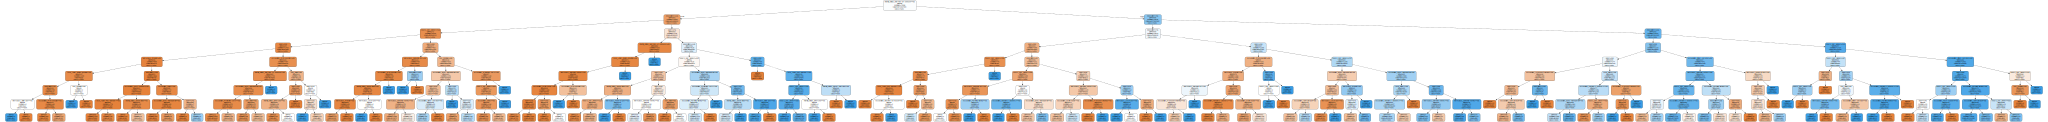

In [84]:
dot_data = tree.export_graphviz(dets, out_file=None,
                                feature_names=X_train.columns,  
                                class_names=["<=50K", ">50K"],  
                                filled=True, rounded=True, 
                                special_characters=False) 
graph = graphviz.Source(dot_data)
graph

**<font color='purple'>Answer to (f):</font>**  
1. From the root node we get the FALSE decision and move to the right node.  
2. From the education node we get the TRUE decision and move down.
3. From the education node we get the FALSE decision and move to the right node.
4. From the age node we get the FALSE decision and move to the right node.
5. From the hours_per_week node we get the TRUE decision and move down.
6. From the occupation node we get the TRUE decision and move to the left node.
7. From the age node we get the TRUE decision and mvoe to the left node.
8. From the occupation node we get the TRUE decision and move to the left node.  

Final decision is the class "$\leq 50k$". The true label is the same, so we classified correctly.

- **(g)** What seem to be the most important features? Check out the feature importances given by the sklearn model from **(f)**. Do they agree with your guess? How are these feature importances calculated? Hint: feature importances are given by `dt.feature_importances_`

In [107]:
fi = dets.feature_importances_

df = pd.DataFrame({"Feature" : X_train.columns, "Importance" : fi}).sort_values(by = "Importance", ascending = False)
df

,Feature,Importance
13,marital_status_ Married-civ-spouse,0.513652
1,education,0.221818
0,age,0.112502
2,hours_per_week,0.052721
21,occupation_ Exec-managerial,0.013621
8,workclass_ Self-emp-not-inc,0.010609
37,sex_ Female,0.008594
23,occupation_ Handlers-cleaners,0.007567
25,occupation_ Other-service,0.007326
22,occupation_ Farming-fishing,0.006184


**<font color='purple'>Answer to (g):</font>** I would say that the most important features are age, education and work hours. We can see that the model thinks also that these features are important. I did not expect to see that a specific marital status would have such a big importance. Also I am surprised to see that occupation also has a low importance value.  
It is calculated via gini importance. Basically it tells us how much information we get out of a specific variable.


## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 30 minutes or 24 hours. The results are used to improve the homeworks next year.

**<font color='red'>Answer:</font>** 2,5 hours

<font color='red'>Please use <b>"Kernel->Restart and Run All"</b> command in Jupyter Notebook before submitting the homework and check your results. This ensures that we would be able to replicate your results while grading.</font>